## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import file
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
#See high level understanding
df.shape
#frame.head()



(1456714, 23)

In [ ]:
# Cleaning data
df = df[["Date", "Block", "IUCR", "Primary Type", "Description", "Location Description", "Arrest", "Domestic", 
       "District", "Community Area", "FBI Code", "X Coordinate", "Y Coordinate","Year", "Latitude", "Longitude"]]
       
df.columns = ["Date", "Block", "IUCR", "Primary_Type", "Description", "Location_Description", "Arrest", "Domestic", 
              "District", "Community_Area", "FBI_Code", "X_Coordinate", "Y_Coordinate", 
              "Year", "Latitude", "Longitude"]
df.head()

,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,District,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Latitude,Longitude
0,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,08B,1154907.0,1893681.0,2016,41.864073,-87.706819
1,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,08B,1183066.0,1864330.0,2016,41.782922,-87.604363
2,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,24,1140789.0,1904819.0,2016,41.894908,-87.758372
3,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,25.0,08B,1143223.0,1901475.0,2016,41.885687,-87.749516
4,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,25.0,06,1139890.0,1901675.0,2016,41.886297,-87.761751


In [ ]:
# see high level understanding of new df
df.shape

(1456714, 16)

In [ ]:
print(df.isnull().any())
print(df.isnull().sum() / len(df) * 100)
#lots of nulls, seems like less than 1% for most columns but x and y and latitude and longitude have many, lets drop those.
df.drop(['X_Coordinate', 'Y_Coordinate', 'Latitude', 'Longitude'], axis=1, inplace=True)  
df.head()

#now, lets drop other rows with null values
df = df.dropna()

#check
print(df.isnull().any())
print(df.isnull().sum() / len(df) * 100)

#great!

Date                    False
Block                   False
IUCR                    False
Primary_Type            False
Description             False
Location_Description     True
Arrest                  False
Domestic                False
District                 True
Community_Area           True
FBI_Code                False
X_Coordinate             True
Y_Coordinate             True
Year                    False
Latitude                 True
Longitude                True
dtype: bool
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary_Type            0.000000
Description             0.000000
Location_Description    0.113818
Arrest                  0.000000
Domestic                0.000000
District                0.000069
Community_Area          0.002746
FBI_Code                0.000000
X_Coordinate            2.545661
Y_Coordinate            2.545661
Year                    0.000000
Latitude                2.545661
Longitude    

In [ ]:
# Gain higher level understanding of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455015 entries, 0 to 1456713
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1455015 non-null  object 
 1   Block                 1455015 non-null  object 
 2   IUCR                  1455015 non-null  object 
 3   Primary_Type          1455015 non-null  object 
 4   Description           1455015 non-null  object 
 5   Location_Description  1455015 non-null  object 
 6   Arrest                1455015 non-null  bool   
 7   Domestic              1455015 non-null  bool   
 8   District              1455015 non-null  float64
 9   Community_Area        1455015 non-null  float64
 10  FBI_Code              1455015 non-null  object 
 11  Year                  1455015 non-null  int64  
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 124.9+ MB


In [ ]:
# Find unique values

print('IUCR')
print(*list(df.IUCR.unique()))
print('Primary Type')
print(*list(df.Primary_Type.unique()))
print('Description')
print(*list(df.Description.unique()))
print('Location Description')
print(*list(df.Location_Description.unique()))
print('Arrest')
print(*list(df.Arrest.unique()))
print('Domestic')
print(*list(df.Domestic.unique()))
print('Commmunity Area')
print(*list(df.Community_Area.unique()))
print('FBI Code')
print(*list(df.FBI_Code.unique()))
print('Year')
print(*list(df.Year.unique()))

IUCR
0486 0470 0460 0820 041A 143A 0890 0810 0313 0910 0560 5002 1130 1153 1305 1310 2825 1477 2820 1152 1320 0860 1154 1150 2850 0320 1330 501A 0620 0580 2840 0610 0630 1110 031A 0880 2826 0265 1811 1563 0312 0281 1541 051A 1752 1792 0110 0520 1261 0266 0330 1562 1544 5007 1121 4650 0554 1710 0850 0496 0497 0430 1365 4387 1156 3731 1821 0325 143B 1512 0545 0870 4625 0484 2170 2093 2028 5111 2024 1360 5011 2034 4510 2092 0530 502R 502P 0454 0334 2027 0326 1350 1210 1780 2014 1661 1506 141A 0930 0650 0420 1200 2860 5000 1155 0920 1750 1753 1812 2017 2031 1822 2022 2015 2025 2091 2018 2021 2032 0453 4651 0462 1120 1122 3960 1565 1195 2023 1435 3300 4230 2011 5130 0498 1754 1025 0917 141C 0552 0340 0550 0495 0337 1585 0440 1345 1790 4255 4386 2250 3730 0918 1220 1570 0483 2220 0261 1020 051B 0331 0479 3710 033A 2851 4310 3760 1242 3800 143C 1670 0915 1206 2090 5001 031B 1540 5093 2020 0291 2013 500N 1460 1090 2890 1751 0263 0488 3970 1151 0482 1582 2900 0557 0558 2012 1140 1536 2830 2026 

In [ ]:
# Changing values into categories
df.IUCR=pd.Categorical(df.IUCR)
df.Community_Area=pd.Categorical(df.Community_Area)
df.FBI_Code=pd.Categorical(df.FBI_Code)
df.Primary_Type = pd.Categorical(df.Primary_Type)


In [ ]:
# Checking to see if new categories were changed, they were!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455015 entries, 0 to 1456713
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Date                  1455015 non-null  object  
 1   Block                 1455015 non-null  object  
 2   IUCR                  1455015 non-null  category
 3   Primary_Type          1455015 non-null  category
 4   Description           1455015 non-null  object  
 5   Location_Description  1455015 non-null  object  
 6   Arrest                1455015 non-null  bool    
 7   Domestic              1455015 non-null  bool    
 8   District              1455015 non-null  float64 
 9   Community_Area        1455015 non-null  category
 10  FBI_Code              1455015 non-null  category
 11  Year                  1455015 non-null  int64   
dtypes: bool(2), category(4), float64(1), int64(1), object(4)
memory usage: 87.4+ MB


In [ ]:
# Find duplicate rows

df.shape
#(374952, 16)
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
# (332,16)
# There are 24 rows of duplicate data


number of duplicate rows:  (3238, 12)


In [ ]:
# Deleting Duplicate Rows
df.drop_duplicates(subset=None, keep= 'first', inplace=False)
df.shape

(1455015, 12)

In [ ]:
# See how many unique numbers of each column there are
df.describe(include='all')

,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,District,Community_Area,FBI_Code,Year
count,1455015,1455015,1455015,1455015,1455015,1455015,1455015,1455015,1.455015e+06,1455015.0,1455015,1.455015e+06
unique,581763,32651,365,33,342,142,2,2,NaN,78.0,26,NaN
top,01/01/2012 12:01:00 AM,001XX N STATE ST,0820,THEFT,SIMPLE,STREET,False,False,NaN,25.0,06,NaN
freq,166,3630,135580,328980,150595,330464,1077554,1234963,NaN,94676.0,328980,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.125645e+01,NaN,NaN,2.013896e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.904109e+00,NaN,NaN,1.449141e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.012000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+00,NaN,NaN,2.013000e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+01,NaN,NaN,2.014000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01,NaN,NaN,2.015000e+03


In [ ]:
# Set Date to DateTimeIndex

df = df.set_index(pd.DatetimeIndex(df['Date']))

In [ ]:
# Make sure index set correctly, it did!! 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1455015 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Date                  1455015 non-null  object  
 1   Block                 1455015 non-null  object  
 2   IUCR                  1455015 non-null  category
 3   Primary_Type          1455015 non-null  category
 4   Description           1455015 non-null  object  
 5   Location_Description  1455015 non-null  object  
 6   Arrest                1455015 non-null  bool    
 7   Domestic              1455015 non-null  bool    
 8   District              1455015 non-null  float64 
 9   Community_Area        1455015 non-null  category
 10  FBI_Code              1455015 non-null  category
 11  Year                  1455015 non-null  int64   
dtypes: bool(2), category(4), float64(1), int64(1), object(4)
memory usage: 87.4+ MB


In [ ]:
from sklearn.dummy import DummyClassifier

# make dummy variables 
dfTwo = df[['Arrest', 'Primary_Type', 'Domestic', 'Community_Area', 'Year']]
dfTwo = pd.get_dummies(dfTwo, columns=['Arrest', 'Primary_Type', 'Domestic'])

#set target and feature columns
feature_cols = ['Community_Area', 'Year', 'Domestic_True', 'Domestic_False', 'Primary_Type_THEFT', 'Primary_Type_BATTERY', 'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_NARCOTICS','Primary_Type_ASSAULT', 'Primary_Type_DECEPTIVE PRACTICE', 'Primary_Type_OTHER OFFENSE', 'Primary_Type_BURGLARY', 'Primary_Type_MOTOR VEHICLE THEFT', 'Primary_Type_ROBBERY']
target_col = ['Arrest_True']
X = dfTwo[feature_cols] # features
y = dfTwo[target_col] # target variable

print(X.head())
print(y.head())

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

                    Community_Area  ...  Primary_Type_ROBBERY
Date                                ...                      
2016-05-03 23:40:00           29.0  ...                     0
2016-05-03 21:40:00           42.0  ...                     0
2016-05-03 23:31:00           25.0  ...                     0
2016-05-03 22:10:00           25.0  ...                     0
2016-05-03 22:00:00           25.0  ...                     0

[5 rows x 14 columns]
                     Arrest_True
Date                            
2016-05-03 23:40:00            1
2016-05-03 21:40:00            0
2016-05-03 23:31:00            0
2016-05-03 22:10:00            0
2016-05-03 22:00:00            0


In [ ]:
dfTwo.corr()

,Year,Arrest_False,Arrest_True,Primary_Type_ARSON,Primary_Type_ASSAULT,Primary_Type_BATTERY,Primary_Type_BURGLARY,Primary_Type_CONCEALED CARRY LICENSE VIOLATION,Primary_Type_CRIM SEXUAL ASSAULT,Primary_Type_CRIMINAL DAMAGE,Primary_Type_CRIMINAL TRESPASS,Primary_Type_DECEPTIVE PRACTICE,Primary_Type_GAMBLING,Primary_Type_HOMICIDE,Primary_Type_HUMAN TRAFFICKING,Primary_Type_INTERFERENCE WITH PUBLIC OFFICER,Primary_Type_INTIMIDATION,Primary_Type_KIDNAPPING,Primary_Type_LIQUOR LAW VIOLATION,Primary_Type_MOTOR VEHICLE THEFT,Primary_Type_NARCOTICS,Primary_Type_NON - CRIMINAL,Primary_Type_NON-CRIMINAL,Primary_Type_NON-CRIMINAL (SUBJECT SPECIFIED),Primary_Type_OBSCENITY,Primary_Type_OFFENSE INVOLVING CHILDREN,Primary_Type_OTHER NARCOTIC VIOLATION,Primary_Type_OTHER OFFENSE,Primary_Type_PROSTITUTION,Primary_Type_PUBLIC INDECENCY,Primary_Type_PUBLIC PEACE VIOLATION,Primary_Type_ROBBERY,Primary_Type_SEX OFFENSE,Primary_Type_STALKING,Primary_Type_THEFT,Primary_Type_WEAPONS VIOLATION,Domestic_False,Domestic_True
Year,1.000000,0.056423,-0.056423,0.005597,0.016635,0.012859,-0.022957,0.007861,0.007315,0.012487,-0.002312,0.037632,-0.013709,0.010916,0.003882,0.001614,0.000395,0.000227,-0.008512,-0.010108,-0.067222,0.002872,0.006861,-0.000453,0.004076,0.008107,-0.000092,0.020742,-0.014766,-0.000041,-0.010028,0.006264,0.001783,0.000557,-0.000518,0.006528,-0.018173,0.018173
Arrest_False,0.056423,1.000000,-1.000000,0.014357,0.015100,0.032186,0.115836,-0.010697,0.022057,0.153103,-0.163052,0.073819,-0.065647,-0.007165,0.001167,-0.102440,0.003951,0.010679,-0.060187,0.090706,-0.535925,0.001184,0.003359,0.000036,-0.013900,0.020199,-0.004564,0.027798,-0.121961,-0.011029,-0.108554,0.075832,0.002176,0.004787,0.182453,-0.134437,-0.062960,0.062960
Arrest_True,-0.056423,-1.000000,1.000000,-0.014357,-0.015100,-0.032186,-0.115836,0.010697,-0.022057,-0.153103,0.163052,-0.073819,0.065647,0.007165,-0.001167,0.102440,-0.003951,-0.010679,0.060187,-0.090706,0.535925,-0.001184,-0.003359,-0.000036,0.013900,-0.020199,0.004564,-0.027798,0.121961,0.011029,0.108554,-0.075832,-0.002176,-0.004787,-0.182453,0.134437,0.062960,-0.062960
Primary_Type_ARSON,0.005597,0.014357,-0.014357,1.000000,-0.010107,-0.018379,-0.009632,-0.000307,-0.002681,-0.013511,-0.006302,-0.009063,-0.001524,-0.001668,-0.000171,-0.002554,-0.000833,-0.001074,-0.001432,-0.008181,-0.012504,-0.000200,-0.000312,-0.000065,-0.000443,-0.003471,-0.000177,-0.009904,-0.002837,-0.000255,-0.003727,-0.007910,-0.002267,-0.000932,-0.021115,-0.004277,0.012014,-0.012014
Primary_Type_ASSAULT,0.016635,0.015100,-0.015100,-0.010107,1.000000,-0.121723,-0.063794,-0.002035,-0.017759,-0.089482,-0.041741,-0.060025,-0.010095,-0.011049,-0.001135,-0.016918,-0.005520,-0.007113,-0.009485,-0.054185,-0.082814,-0.001322,-0.002069,-0.000429,-0.002933,-0.022988,-0.001175,-0.065593,-0.018788,-0.001689,-0.024681,-0.052389,-0.015016,-0.006174,-0.139844,-0.028325,-0.073517,0.073517
Primary_Type_BATTERY,0.012859,0.032186,-0.032186,-0.018379,-0.121723,1.000000,-0.116007,-0.003700,-0.032293,-0.162719,-0.075905,-0.109153,-0.018358,-0.020093,-0.002064,-0.030765,-0.010038,-0.012935,-0.017248,-0.098532,-0.150593,-0.002404,-0.003761,-0.000780,-0.005334,-0.041803,-0.002136,-0.119278,-0.034166,-0.003071,-0.044882,-0.095267,-0.027307,-0.011226,-0.254300,-0.051508,-0.444434,0.444434
Primary_Type_BURGLARY,-0.022957,0.115836,-0.115836,-0.009632,-0.063794,-0.116007,1.000000,-0.001939,-0.016925,-0.085280,-0.039781,-0.057206,-0.009621,-0.010530,-0.001082,-0.016123,-0.005261,-0.006779,-0.009040,-0.051640,-0.078925,-0.001260,-0.001971,-0.000409,-0.002796,-0.021909,-0.001120,-0.062512,-0.017906,-0.001610,-0.023522,-0.049928,-0.014311,-0.005884,-0.133277,-0.026995,0.098834,-0.098834
Primary_Type_CONCEALED CARRY LICENSE VIOLATION,0.007861,-0.010697,0.010697,-0.000307,-0.002035,-0.003700,-0.001939,1.000000,-0.000540,-0.002720,-0.001269,-0.001825,-0.000307,-0.000336,-0.000035,-0.000514,-0.000168,-0.000216,-0.000288,-0.001647,-0.002517,-0.000040,-0.000063,-0.000013,-0.000

In [ ]:
correlations = dfTwo.corr()
print(correlations["Arrest_True"])
#Looks like most correlated are Deceptive practice, Criminal Damage, Criminal tresspass, Narcostics (highest), 
# theft, weapons violation, and prostitution

Year                                             -0.056423
Arrest_False                                     -1.000000
Arrest_True                                       1.000000
Primary_Type_ARSON                               -0.014357
Primary_Type_ASSAULT                             -0.015100
Primary_Type_BATTERY                             -0.032186
Primary_Type_BURGLARY                            -0.115836
Primary_Type_CONCEALED CARRY LICENSE VIOLATION    0.010697
Primary_Type_CRIM SEXUAL ASSAULT                 -0.022057
Primary_Type_CRIMINAL DAMAGE                     -0.153103
Primary_Type_CRIMINAL TRESPASS                    0.163052
Primary_Type_DECEPTIVE PRACTICE                  -0.073819
Primary_Type_GAMBLING                             0.065647
Primary_Type_HOMICIDE                             0.007165
Primary_Type_HUMAN TRAFFICKING                   -0.001167
Primary_Type_INTERFERENCE WITH PUBLIC OFFICER     0.102440
Primary_Type_INTIMIDATION                        -0.0039

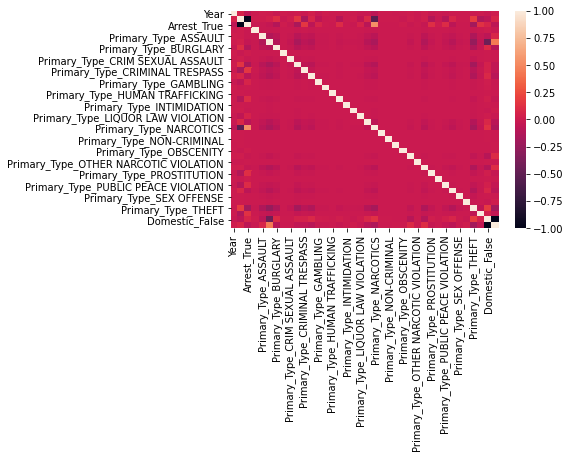

In [ ]:
sn.heatmap(correlations)
plt.show()
#too many variables, lets make a new one

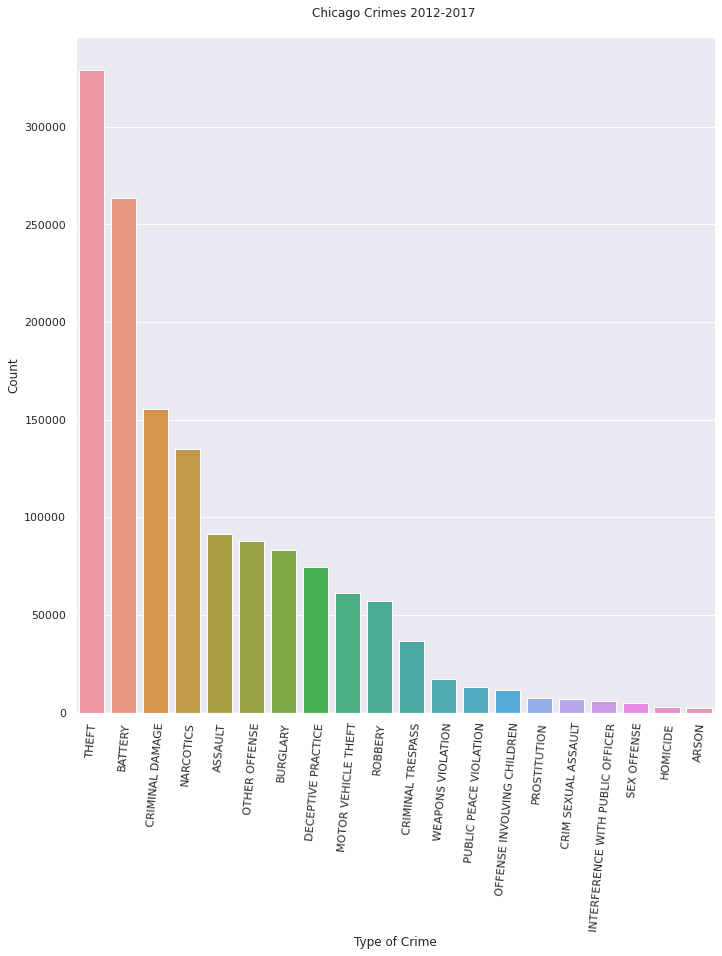

In [ ]:
# Create plot showing all crimes and their prevalence

sn.set(font_scale = 1)
plot = sn.factorplot('Primary_Type',data=df,kind='count', size=10, order=df.Primary_Type.value_counts().iloc[:20].index)
plot.set_xticklabels(rotation=85, step=1)
plot.set(xlabel='Type of Crime', ylabel='Count', title='Chicago Crimes 2012-2017 \n')

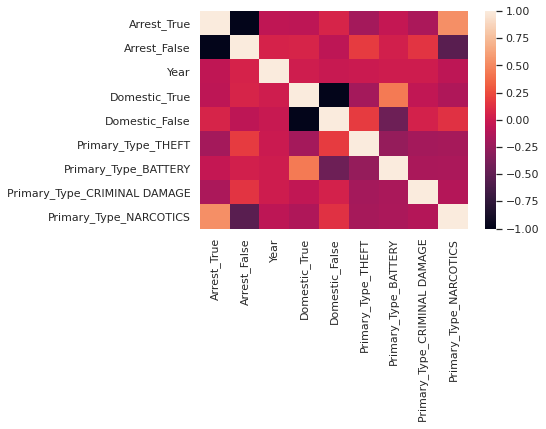

In [ ]:
dfThree = dfTwo[['Arrest_True', 'Arrest_False','Community_Area', 'Year', 'Domestic_True', 'Domestic_False', 'Primary_Type_THEFT', 'Primary_Type_BATTERY', 'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_NARCOTICS']]
simpleCorrelations = dfThree.corr()
sn.heatmap(simpleCorrelations)

In [ ]:
correlationsThree = dfThree.corr()
print(correlationsThree["Arrest_True"])

Arrest_True                     1.000000
Arrest_False                   -1.000000
Year                           -0.056423
Domestic_True                  -0.062960
Domestic_False                  0.062960
Primary_Type_THEFT             -0.182453
Primary_Type_BATTERY           -0.032186
Primary_Type_CRIMINAL DAMAGE   -0.153103
Primary_Type_NARCOTICS          0.535925
Name: Arrest_True, dtype: float64


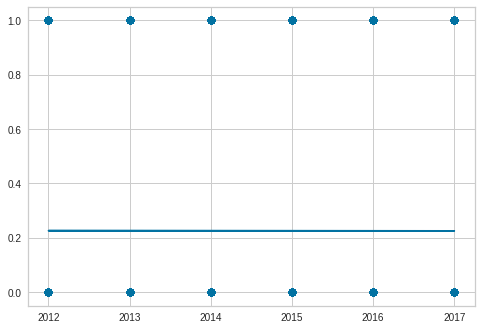

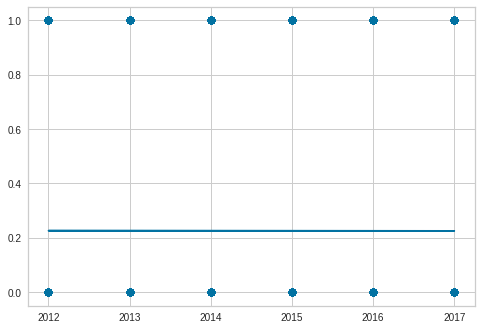

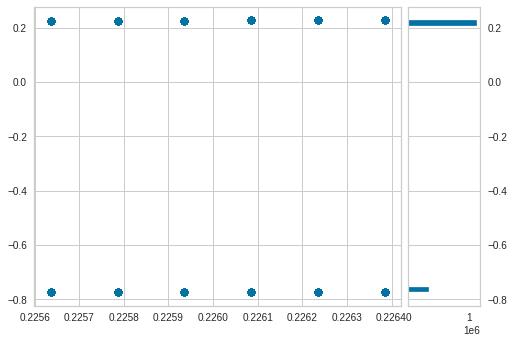

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

X_theft = dfTwo['Primary_Type_THEFT'].values

model = LinearRegression()
x = dfTwo['Year']
X = x[:, np.newaxis]
y = X_theft
model.fit(X, y)

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

y_predicted = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

visualizer = ResidualsPlot(model)
visualizer.fit(X, y)
plt.show()

In [ ]:
print(dfTwo.isnull().any())
print(dfTwo.isnull().sum() / len(df) * 100)
# less than 1% nulls

Community_Area                                    False
Year                                              False
Arrest_False                                      False
Arrest_True                                       False
Primary_Type_ARSON                                False
Primary_Type_ASSAULT                              False
Primary_Type_BATTERY                              False
Primary_Type_BURGLARY                             False
Primary_Type_CONCEALED CARRY LICENSE VIOLATION    False
Primary_Type_CRIM SEXUAL ASSAULT                  False
Primary_Type_CRIMINAL DAMAGE                      False
Primary_Type_CRIMINAL TRESPASS                    False
Primary_Type_DECEPTIVE PRACTICE                   False
Primary_Type_GAMBLING                             False
Primary_Type_HOMICIDE                             False
Primary_Type_HUMAN TRAFFICKING                    False
Primary_Type_INTERFERENCE WITH PUBLIC OFFICER     False
Primary_Type_INTIMIDATION                       

In [ ]:
dfTwo = dfTwo.dropna()
print(dfTwo)
print(dfTwo.isnull().any())


                    Community_Area  Year  ...  Domestic_False  Domestic_True
Date                                      ...                               
2016-05-03 23:40:00           29.0  2016  ...               0              1
2016-05-03 21:40:00           42.0  2016  ...               0              1
2016-05-03 23:31:00           25.0  2016  ...               1              0
2016-05-03 22:10:00           25.0  2016  ...               1              0
2016-05-03 22:00:00           25.0  2016  ...               0              1
...                            ...   ...  ...             ...            ...
2016-05-03 23:33:00           30.0  2016  ...               0              1
2016-05-03 23:30:00           69.0  2016  ...               0              1
2016-05-03 00:15:00           66.0  2016  ...               1              0
2016-05-03 21:07:00           46.0  2016  ...               0              1
2016-05-03 23:38:00           69.0  2016  ...               1              0

In [ ]:
#set target and feature columns
feature_cols = ['Community_Area', 'Year', 'Domestic_True', 'Domestic_False', 'Primary_Type_THEFT', 'Primary_Type_BATTERY', 'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_NARCOTICS','Primary_Type_ASSAULT', 'Primary_Type_DECEPTIVE PRACTICE', 'Primary_Type_OTHER OFFENSE', 'Primary_Type_BURGLARY', 'Primary_Type_MOTOR VEHICLE THEFT', 'Primary_Type_ROBBERY']
target_col = ['Arrest_True']
X = dfTwo[feature_cols] # features
y = dfTwo[target_col] # target variable

print(X.head())
print(y.head())

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

                    Community_Area  ...  Primary_Type_ROBBERY
Date                                ...                      
2016-05-03 23:40:00           29.0  ...                     0
2016-05-03 21:40:00           42.0  ...                     0
2016-05-03 23:31:00           25.0  ...                     0
2016-05-03 22:10:00           25.0  ...                     0
2016-05-03 22:00:00           25.0  ...                     0

[5 rows x 14 columns]
                     Arrest_True
Date                            
2016-05-03 23:40:00            1
2016-05-03 21:40:00            0
2016-05-03 23:31:00            0
2016-05-03 22:10:00            0
2016-05-03 22:00:00            0


In [ ]:
#Dummy classifier model

from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)
y_pred = dummy_classifier.predict(X_test)

### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)



Baseline Accuracy =  0.7410887577868559


[[269574      0]
 [ 94180      0]]


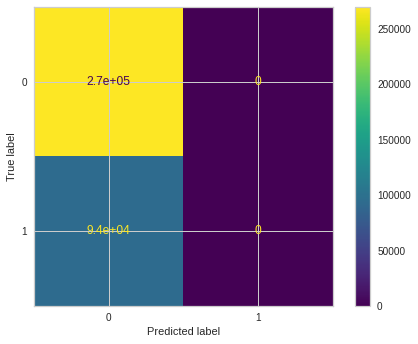

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(dummy_classifier, X_test, y_test)
plt.show()

In [ ]:
# Logistic model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
y_pred = logmodel.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8566448753828136


[[260522   9052]
 [ 43094  51086]]


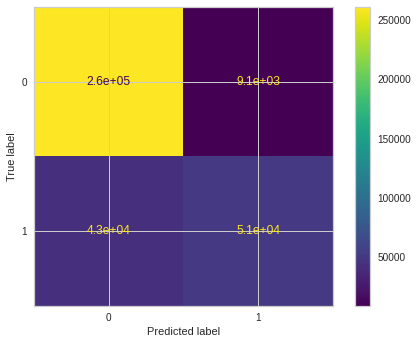

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(logmodel, X_test, y_test)
plt.show()


In [ ]:
TheftContingencyTable = pd.crosstab(dfTwo['Arrest_True'], dfTwo['Primary_Type_THEFT'])
print(TheftContingencyTable)


Primary_Type_THEFT       0       1
Arrest_True                       
0                   785244  292310
1                   340791   36670


(<Figure size 576x396 with 3 Axes>,
 OrderedDict([(('1', '0'), (0.0, 0.0, 0.2581300430422466, 0.8998513859357945)),
              (('1', '1'),
               (0.0,
                0.903173645072007,
                0.2581300430422466,
                0.09682635492799281)),
              (('0', '0'),
               (0.26310516742035606,
                0.0,
                0.7368948325796439,
                0.7263071882679141)),
              (('0', '1'),
               (0.26310516742035606,
                0.7296294474041266,
                0.7368948325796439,
                0.2703705525958733))]))

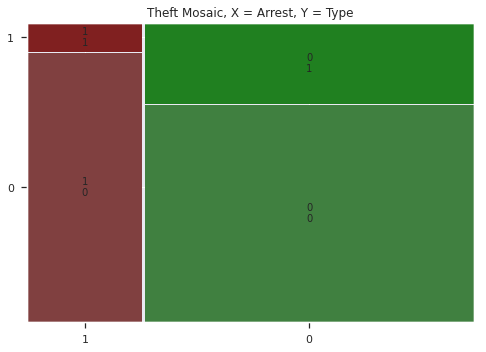

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(dfTwo,['Arrest_True','Primary_Type_THEFT'], axes_label=True, title="Theft Mosaic, X = Arrest, Y = Type")

In [ ]:
NarcoticsContingencyTable = pd.crosstab(dfTwo['Arrest_True'], dfTwo['Primary_Type_NARCOTICS'])
print(NarcoticsContingencyTable)

Primary_Type_NARCOTICS        0       1
Arrest_True                            
0                       1076648     906
1                        243147  134314


(<Figure size 576x396 with 3 Axes>,
 OrderedDict([(('1', '0'),
               (0.0, 0.0, 0.28395536028649737, 0.6004715270766072)),
              (('1', '1'),
               (0.0,
                0.6037937862128198,
                0.28395536028649737,
                0.3962062137871801)),
              (('0', '0'),
               (0.28893048466460686,
                0.0,
                0.7110695153353933,
                0.9964887955105624)),
              (('0', '1'),
               (0.28893048466460686,
                0.9998110546467751,
                0.7110695153353933,
                0.00018894535322490664))]))

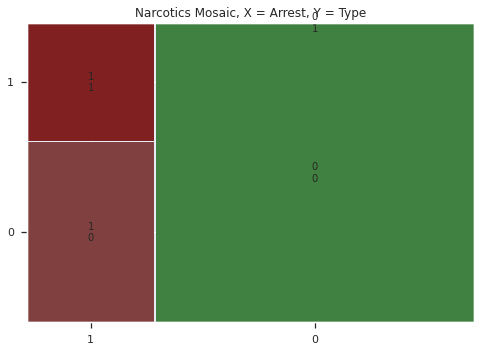

In [ ]:
mosaic(dfTwo,['Arrest_True','Primary_Type_NARCOTICS'], axes_label=True, title="Narcotics Mosaic, X = Arrest, Y = Type")

In [ ]:
TresspassContingencyTable = pd.crosstab(dfTwo['Arrest_True'], dfTwo['Primary_Type_CRIMINAL TRESPASS'])
print(TresspassContingencyTable)

Primary_Type_CRIMINAL TRESPASS       0     1
Arrest_True                                 
0                               109711  1063
1                                41265  2971


(<Figure size 576x396 with 3 Axes>,
 OrderedDict([(('1', '0'), (0.0, 0.0, 0.28395536028649737, 0.971037554836502)),
              (('1', '1'),
               (0.0,
                0.9743598139727147,
                0.28395536028649737,
                0.025640186027285242)),
              (('0', '0'),
               (0.28893048466460686,
                0.0,
                0.7110695153353933,
                0.8623016051297643)),
              (('0', '1'),
               (0.28893048466460686,
                0.8656238642659769,
                0.7110695153353933,
                0.134376135734023))]))

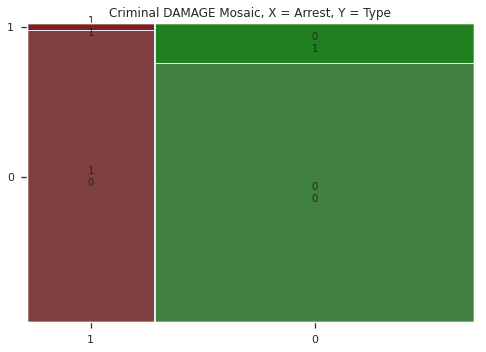

In [ ]:
mosaic(dfTwo,['Arrest_True','Primary_Type_CRIMINAL DAMAGE'], axes_label=True, title="Criminal DAMAGE Mosaic, X = Arrest, Y = Type")

In [ ]:
DamageContingencyTable = pd.crosstab(dfTwo['Arrest_True'], dfTwo['Primary_Type_CRIMINAL DAMAGE'])
print(DamageContingencyTable)

Primary_Type_CRIMINAL DAMAGE       0       1
Arrest_True                                 
0                             932266  145288
1                             367296   10165


(<Figure size 576x396 with 3 Axes>,
 OrderedDict([(('1', '0'), (0.0, 0.0, 0.28395536028649737, 0.971037554836502)),
              (('1', '1'),
               (0.0,
                0.9743598139727147,
                0.28395536028649737,
                0.025640186027285242)),
              (('0', '0'),
               (0.28893048466460686,
                0.0,
                0.7110695153353933,
                0.8623016051297643)),
              (('0', '1'),
               (0.28893048466460686,
                0.8656238642659769,
                0.7110695153353933,
                0.134376135734023))]))

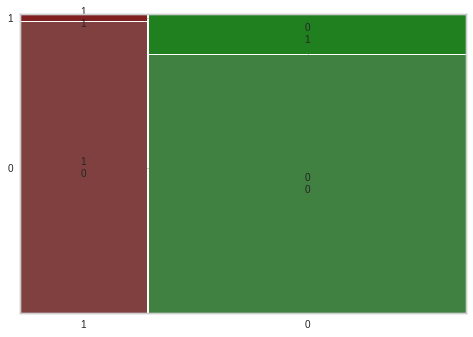

In [ ]:
mosaic(dfTwo,['Arrest_True','Primary_Type_CRIMINAL DAMAGE'], axes_label=True)

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X, y = make_classification(n_samples=2000, n_features=20, n_redundant=5, random_state=1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.943 (0.013)


In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     27679
           1       0.85      0.58      0.69     11074

    accuracy                           0.85     38753
   macro avg       0.85      0.77      0.80     38753
weighted avg       0.85      0.85      0.84     38753



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
y_pred = dt.predict(X_test)

[[261334   8240]
 [ 43547  50633]]
Accuracy = 0.8576318061107232


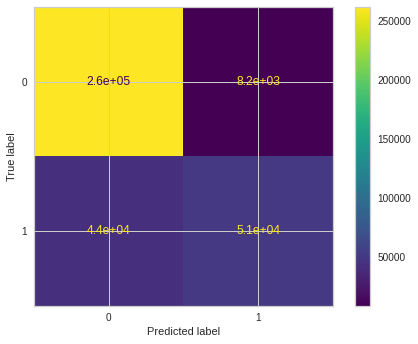

In [ ]:
from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [ ]:
#set target and feature columns
feature_cols = ['Community_Area', 'Year', 'Domestic_True', 'Domestic_False', 'Primary_Type_THEFT', 'Primary_Type_BATTERY', 'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_NARCOTICS','Primary_Type_ASSAULT', 'Primary_Type_DECEPTIVE PRACTICE', 'Primary_Type_OTHER OFFENSE', 'Primary_Type_BURGLARY', 'Primary_Type_MOTOR VEHICLE THEFT', 'Primary_Type_ROBBERY']
target_col = ['Arrest_True']
X = dfTwo[feature_cols] # features
y = dfTwo[target_col] # target variable

print(X.head())
print(y.head())

# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

                    Community_Area  ...  Primary_Type_ROBBERY
Date                                ...                      
2016-05-03 23:40:00           29.0  ...                     0
2016-05-03 21:40:00           42.0  ...                     0
2016-05-03 23:31:00           25.0  ...                     0
2016-05-03 22:10:00           25.0  ...                     0
2016-05-03 22:00:00           25.0  ...                     0

[5 rows x 14 columns]
                     Arrest_True
Date                            
2016-05-03 23:40:00            1
2016-05-03 21:40:00            0
2016-05-03 23:31:00            0
2016-05-03 22:10:00            0
2016-05-03 22:00:00            0


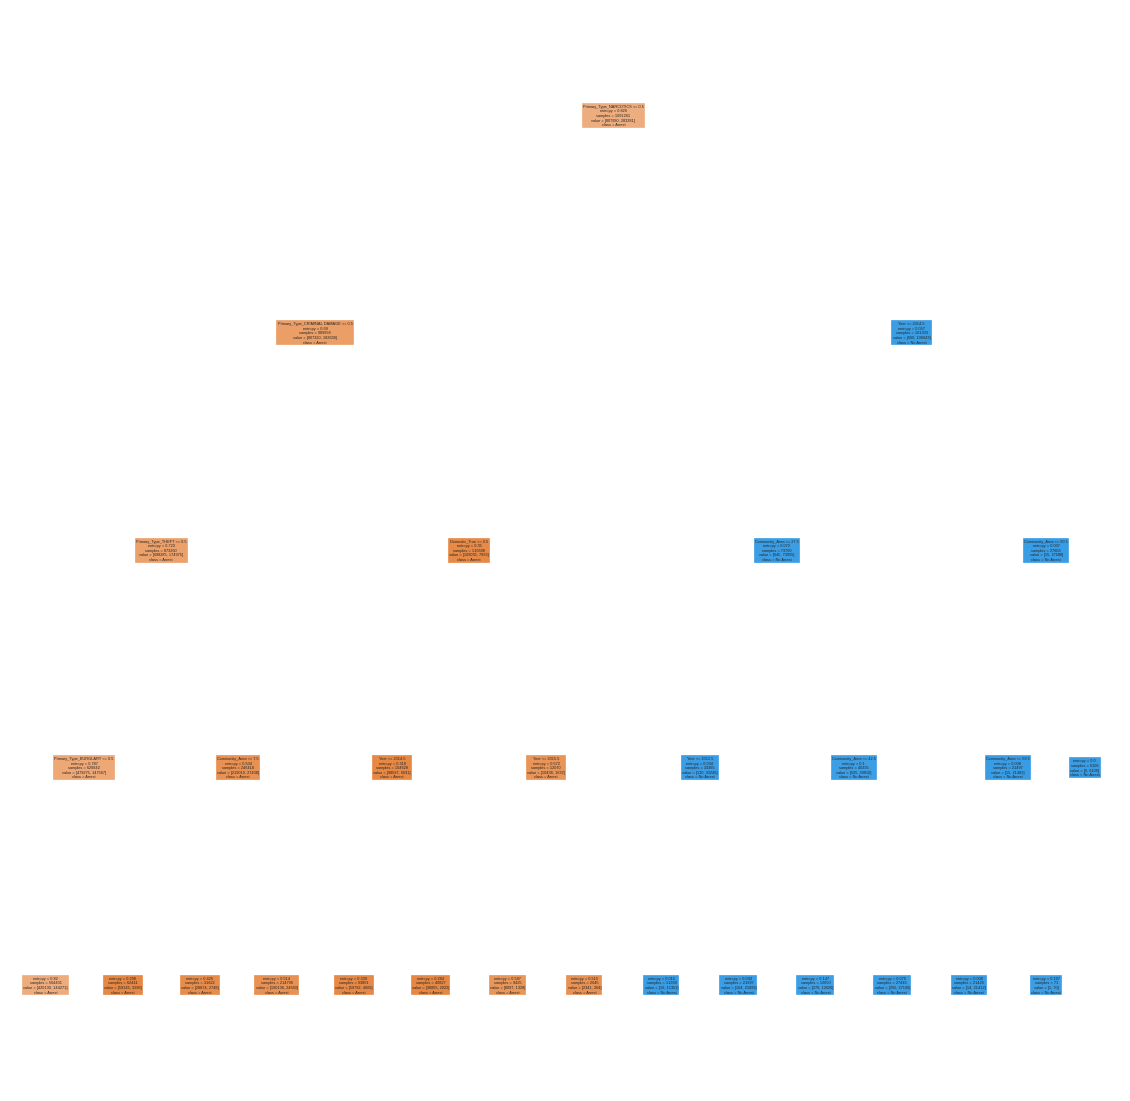

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
feature_cols = ['Community_Area', 'Year', 'Domestic_True', 'Domestic_False', 'Primary_Type_THEFT', 'Primary_Type_BATTERY', 'Primary_Type_CRIMINAL DAMAGE', 'Primary_Type_NARCOTICS','Primary_Type_ASSAULT', 'Primary_Type_DECEPTIVE PRACTICE', 'Primary_Type_OTHER OFFENSE', 'Primary_Type_BURGLARY', 'Primary_Type_MOTOR VEHICLE THEFT', 'Primary_Type_ROBBERY']
features = feature_cols
classes = ['Arrest_True', 'Arrest_False']
tree.plot_tree(dt,feature_names=feature_cols,class_names=['Arrest', 'No Arrest'],filled=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(25,15))
limitedTree = tree.plot_tree(dt, feature_names = feature_cols, filled=True, fontsize=10)
plt.show()

[[261334   8240]
 [ 43547  50633]]
Accuracy = 0.8576318061107232


KeyboardInterrupt: ignored

[[269328    246]
 [ 60509  33671]]
Accuracy = 0.832977781687624


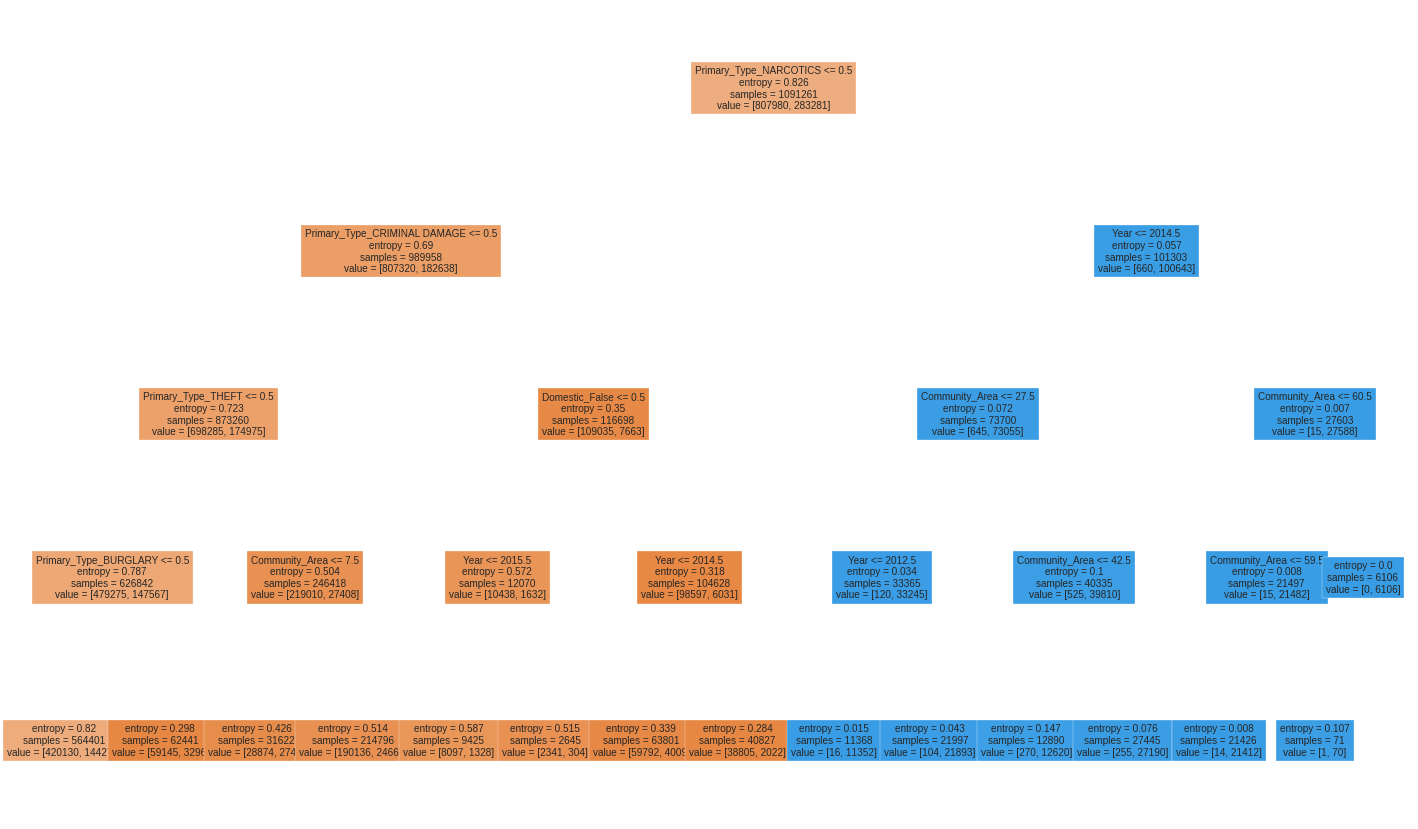

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)


from sklearn import metrics

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(25,15))
limitedTree = tree.plot_tree(dt, feature_names = feature_cols, filled=True, fontsize=10)
plt.show()

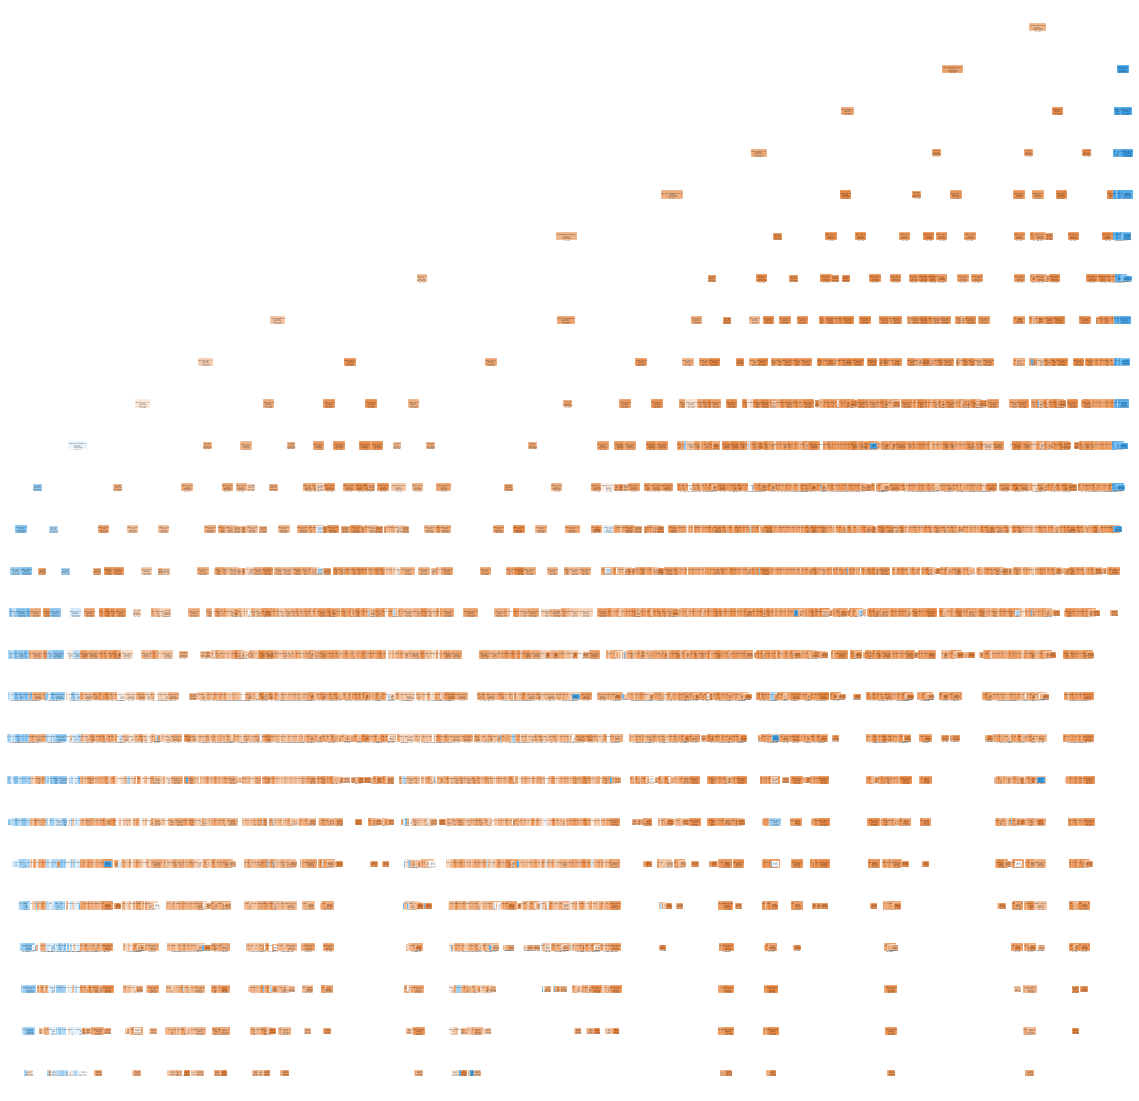

In [ ]:
feature_importances = dt.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})
df = df.sort_values(by='importance', ascending=False)
print(df.iloc[0:3, :])

                 features  importance
7  Primary_Type_NARCOTICS    0.669790
8    Primary_Type_ASSAULT    0.066092
0          Community_Area    0.039600


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)


model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
accuracy_score = accuracy_score(y_test, predict_rf)


In [ ]:
print(recall_rf)
print(predict_rf)
print(precision_rf)
print("Accuracy score: ", accuracy_score)

0.5384264174984073
[0 0 0 ... 0 0 0]
0.8590523302105745
Accuracy score:  0.8576208096680724


[[261254   8320]
 [ 43471  50709]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    269574
           1       0.86      0.54      0.66     94180

    accuracy                           0.86    363754
   macro avg       0.86      0.75      0.79    363754
weighted avg       0.86      0.86      0.85    363754

Accuracy:  0.8576208096680724
[[261254   8320]
 [ 43471  50709]]


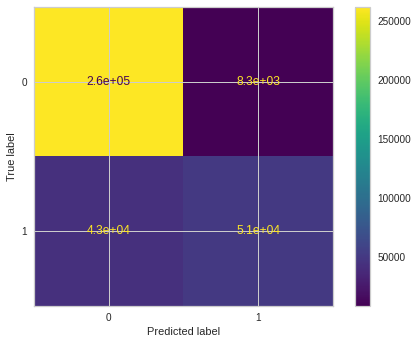

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

0.5384370354640051
[0 0 0 ... 0 0 0]
0.8590547179400305
0.8576235587787351
[[261254   8320]
 [ 43470  50710]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    269574
           1       0.86      0.54      0.66     94180

    accuracy                           0.86    363754
   macro avg       0.86      0.75      0.79    363754
weighted avg       0.86      0.86      0.85    363754

Accuracy:  0.8576235587787351
[[261254   8320]
 [ 43470  50710]]


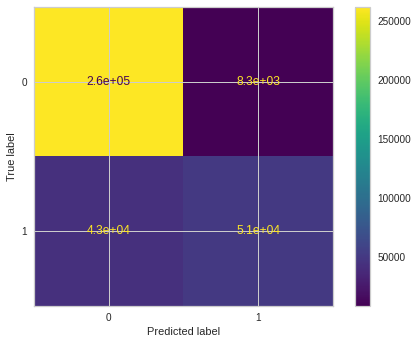

In [ ]:
# Changing random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)


model_rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=10)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
accuracy_score = accuracy_score(y_test, predict_rf)

print(recall_rf)
print(predict_rf)
print(precision_rf)
print(accuracy_score)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

0.5384370354640051
[0 0 0 ... 0 0 0]
0.8590547179400305
0.8576235587787351
[[261254   8320]
 [ 43470  50710]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    269574
           1       0.86      0.54      0.66     94180

    accuracy                           0.86    363754
   macro avg       0.86      0.75      0.79    363754
weighted avg       0.86      0.86      0.85    363754

Accuracy:  0.8576235587787351
[[261254   8320]
 [ 43470  50710]]


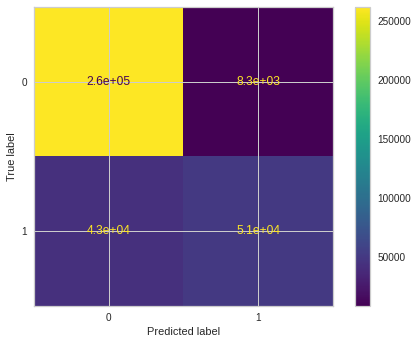

In [ ]:
# Changing random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)


model_rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
accuracy_score = accuracy_score(y_test, predict_rf)

print(recall_rf)
print(predict_rf)
print(precision_rf)
print(accuracy_score)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

metrics.plot_confusion_matrix(model_rf, X_test, y_test)
plt.show()

In [ ]:
# Changing random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)


model_rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)
accuracy_score = accuracy_score(y_test, predict_rf)
print(accuracy_score)

0.8576235587787351
